# Bank application fraud detection


The Bank Account Fraud (BAF) suite of datasets has been published at NeurIPS 2022 and it comprises a total of 6 different synthetic bank account fraud tabular datasets. BAF is a realistic, complete, and robust test bed to evaluate novel and existing methods in ML and fair ML, and the first of its kind!

This suite of datasets is:

- Realistic, based on a present-day real-world dataset for fraud detection;
- Biased, each dataset has distinct controlled types of bias;
- Imbalanced, this setting presents a extremely low prevalence of positive class;
- Dynamic, with temporal data and observed distribution shifts;
- Privacy preserving, to protect the identity of potential applicants we have applied differential privacy techniques (noise addition), feature encoding and trained a generative model (CTGAN).


https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022?datasetOd=2673949&sortBy=voteCount

Citation: @article{jesusTurningTablesBiased2022,
  title={Turning the {{Tables}}: {{Biased}}, {{Imbalanced}}, {{Dynamic Tabular Datasets}} for {{ML Evaluation}}},
  author={Jesus, S{\'e}rgio and Pombal, Jos{\'e} and Alves, Duarte and Cruz, Andr{\'e} and Saleiro, Pedro and Ribeiro, Rita P. and Gama, Jo{\~a}o and Bizarro, Pedro},
  journal={Advances in Neural Information Processing Systems},
  year={2022}
}

## Datasets

Each dataset is composed of:

- 1 million instances;
- 30 realistic features used in the fraud detection use-case;
- A column of “month”, providing temporal information about the dataset;
- Protected attributes, (age group, employment status and % income).

<img src="datasets.png" />

This notebook wil use the base dataset

## Evaluation metrics

<img src="eval_metric.png" />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Base.csv')

In [3]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


## Data exploration

In [4]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

### Check for missing data

In [6]:
df.isna().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [7]:
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

### Explore variables

In [8]:
def display_unique_values(dataframe):
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        print(f"Unique values in column '{column}':\n {unique_values}\n")

display_unique_values(df)

Unique values in column 'fraud_bool':
 [1 0]

Unique values in column 'income':
 [0.9 0.3 0.7 0.6 0.4 0.2 0.8 0.1 0.5]

Unique values in column 'name_email_similarity':
 [0.16682773 0.29628601 0.04498549 ... 0.87940313 0.76211215 0.69745243]

Unique values in column 'prev_address_months_count':
 [ -1  92 172  28 289  35  55 194 103  27  34  58  61  12  57  53  96  30
 111  26  86  64  18 234  97  56  54 125 110  65 217  93 126  25  33  80
  99  45 104  87  49  62 282 101 135 154  36  14  91  83  10  32  51 325
 333 159  11 318 109 152 288 102 336 202 225 118 115 319 201  47  37 241
  60  13 165  66  94  95  98  59  29  89  16 304 211 314  22  31  63 321
 141 112  52 151 142   9  50 173  90 307 106  78  24 195 310   8 146 284
  85  44 160  23 100  38  48 327 140 105 122  67 127  21 119   7 156 179
  88 107  82  42 145 324  39 306 339 209 294  72  79 246 114  84 137  46
 188 220 139  74 312 239  75  20 161 168 290  68 187 303 116 230 297  77
 203 181 177  41 291 123 124 108 295 308 133 1

Unique values in column 'source':
 ['INTERNET' 'TELEAPP']

Unique values in column 'session_length_in_minutes':
 [ 3.8881146  31.79881936  4.72870487 ...  8.19553116  4.33606391
  6.71702157]

Unique values in column 'device_os':
 ['windows' 'other' 'linux' 'macintosh' 'x11']

Unique values in column 'keep_alive_session':
 [0 1]

Unique values in column 'device_distinct_emails_8w':
 [ 1  2  0 -1]

Unique values in column 'device_fraud_count':
 [0]

Unique values in column 'month':
 [7 3 2 1 6 0 5 4]



Customer age includes 10 and 90, which seems a bit odd

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


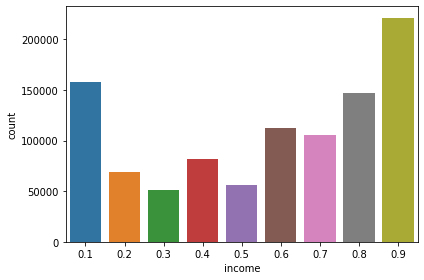

In [10]:
sns.countplot(data=df, x=df.income.round(1))
plt.tight_layout();

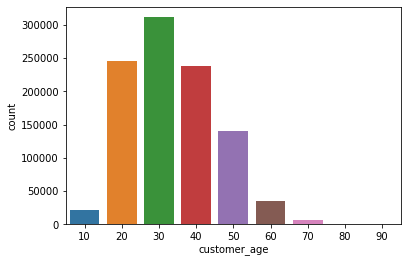

In [11]:
sns.countplot(data=df, x='customer_age');

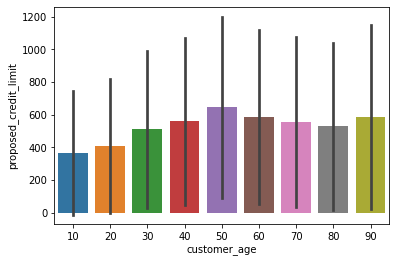

In [12]:
sns.barplot(data=df, y='proposed_credit_limit', x='customer_age',estimator=np.mean,ci='sd');

In [13]:
pd.crosstab(df.fraud_bool, df.month)

month,0,1,2,3,4,5,6,7
fraud_bool,,,,,,,,
0,130940,126422,135781,149544,126239,117912,106718,95415
1,1500,1198,1198,1392,1452,1411,1450,1428


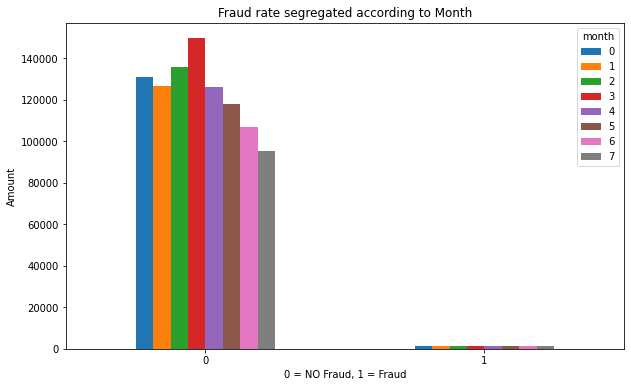

In [14]:
pd.crosstab(df.fraud_bool, df.month).plot(kind='bar', figsize=(10, 6))
plt.title('Fraud rate segregated according to Month')
plt.xlabel('0 = NO Fraud, 1 = Fraud')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show();

In [15]:
cross_tab = pd.crosstab(df.fraud_bool, df.month)

idx = pd.IndexSlice
print(cross_tab.loc[1, idx[0]])

1500


In [16]:
cross_tab = pd.crosstab(df.fraud_bool, df.month)
no_fraud = []
fraud = []
idx = pd.IndexSlice

for i in range(0, 8):
    no_fraud.append(cross_tab.loc[0, idx[i]])
    fraud.append(cross_tab.loc[1, idx[i]])

In [17]:
no_fraud

[130940, 126422, 135781, 149544, 126239, 117912, 106718, 95415]

In [18]:
fraud

[1500, 1198, 1198, 1392, 1452, 1411, 1450, 1428]

In [19]:
month = list(np.arange(0,9))
month

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [20]:
fraud_df = pd.DataFrame(list(zip(month, no_fraud, fraud)),
                       columns=['month', 'no fraud', 'fraud'])
fraud_df

,month,no fraud,fraud
0,0,130940,1500
1,1,126422,1198
2,2,135781,1198
3,3,149544,1392
4,4,126239,1452
5,5,117912,1411
6,6,106718,1450
7,7,95415,1428


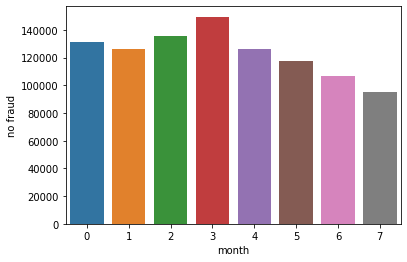

In [21]:
sns.barplot(data=fraud_df, x='month', y='no fraud');

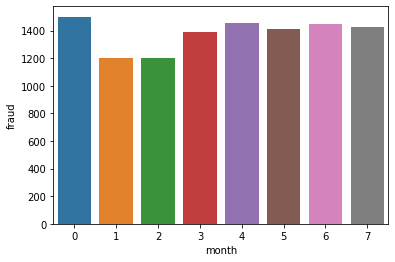

In [22]:
sns.barplot(data=fraud_df, x='month', y='fraud');

In [23]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


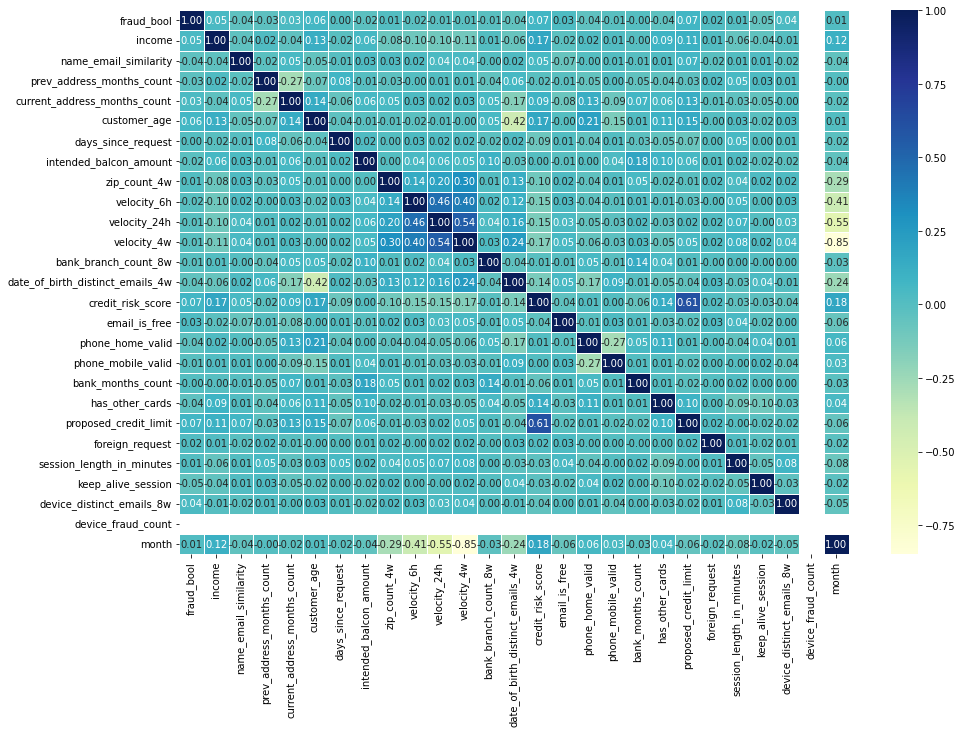

In [24]:
cor_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(cor_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu')
plt.show()

## Model development



In [25]:
# Drop 'device_fraud_count' since it is 0 for all rows

df = df.drop(['device_fraud_count'], axis=1)

In [26]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,24,0,500.0,0,INTERNET,3.888115,windows,0,1,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,-1,0,200.0,0,INTERNET,4.728705,other,0,1,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,31,1,200.0,0,INTERNET,2.047904,linux,0,1,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,7


### Assign dummy variables

In [27]:
X = pd.get_dummies(df.drop('fraud_bool', axis=1), drop_first=True)
y = df['fraud_bool']

### Split the data



In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scale the data

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Testing various models

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "SGD Classifier": SGDClassifier(),
          "ADA Boost": AdaBoostClassifier(),
          "Gradient Boost": GradientBoostingClassifier(),
          "Decision Tree": DecisionTreeClassifier()}

In [30]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Put models in a dictionary
models = {"SGD Classifier": SGDClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [31]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train_scaled,
                             X_test=X_test_scaled,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'SGD Classifier': 0.98888}

In [32]:
model = SGDClassifier(loss='log_loss')
model.fit(X_train_scaled, y_train)

SGDClassifier(loss='log_loss')

In [33]:
preds = model.predict(X_test_scaled)

/home/aapie/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


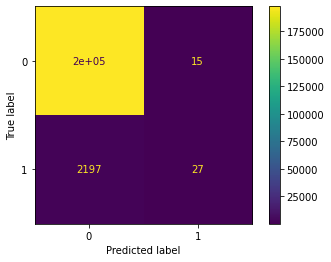

In [34]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test_scaled, y_test)

In [35]:
model.coef_

array([[ 0.24368137, -0.34016111, -0.42173947,  0.07179315,  0.22059479,
         0.02455847, -0.12530933,  0.06144486, -0.03961377,  0.11337938,
        -0.02938419, -0.07840309, -0.14803759,  0.16887898,  0.2543118 ,
        -0.42839074, -0.06643991,  0.15406091, -0.51586672,  0.12895199,
         0.15307543,  0.01734428, -0.38670241,  0.12005656,  0.07093639,
         0.01364786,  0.32692256,  0.07180938, -0.05338451, -0.19141252,
         0.07866261, -0.11583118, -0.09427268, -0.20809684, -0.01925216,
        -0.5394457 , -0.52998989, -0.12857376, -0.50245551, -0.05543006,
        -0.04394893,  0.07479984,  0.15875401,  0.11610635,  0.50066367,
        -0.0189371 ]])

In [36]:
feature_importances = model.coef_

for class_index, class_coef in enumerate(feature_importances):
    print(f"Feature Importances:")
    for feature_index, importance in enumerate(class_coef):
        print(f"{X.columns[feature_index]}: {importance}")

Feature Importances:
income: 0.24368137302752624
name_email_similarity: -0.3401611056534084
prev_address_months_count: -0.4217394715303725
current_address_months_count: 0.07179315268719098
customer_age: 0.22059479293452788
days_since_request: 0.024558465896626865
intended_balcon_amount: -0.1253093313449798
zip_count_4w: 0.06144486439633676
velocity_6h: -0.03961377300293075
velocity_24h: 0.1133793774363481
velocity_4w: -0.029384192160719694
bank_branch_count_8w: -0.07840309471140489
date_of_birth_distinct_emails_4w: -0.14803759413754664
credit_risk_score: 0.16887898425856415
email_is_free: 0.2543117952808743
phone_home_valid: -0.42839074261474047
phone_mobile_valid: -0.06643991493612657
bank_months_count: 0.15406091427142385
has_other_cards: -0.5158667165146997
proposed_credit_limit: 0.12895199205041669
foreign_request: 0.15307542953622058
session_length_in_minutes: 0.01734428399453011
keep_alive_session: -0.3867024050310908
device_distinct_emails_8w: 0.12005655720469692
month: 0.070936

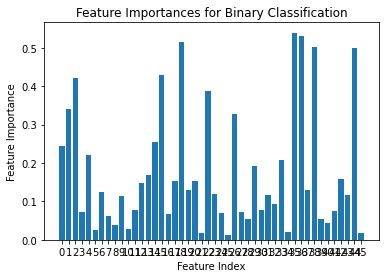

In [37]:
plt.bar(range(len(feature_importances[0])), abs(feature_importances[0]))
plt.xticks(range(len(feature_importances[0])), range(len(feature_importances[0])))
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importances for Binary Classification')
plt.show()

In [38]:
feature_names = X.columns
feature_importances = model.coef_
feat_df = pd.DataFrame(feature_importances, columns=feature_names).T
feat_df.columns = ["Coefficient"]
feat_df = feat_df.sort_values(by="Coefficient", ascending=False)

feat_df

,Coefficient
device_os_windows,0.500664
payment_type_AC,0.326923
email_is_free,0.254312
income,0.243681
customer_age,0.220595
credit_risk_score,0.168879
device_os_macintosh,0.158754
bank_months_count,0.154061
foreign_request,0.153075
proposed_credit_limit,0.128952


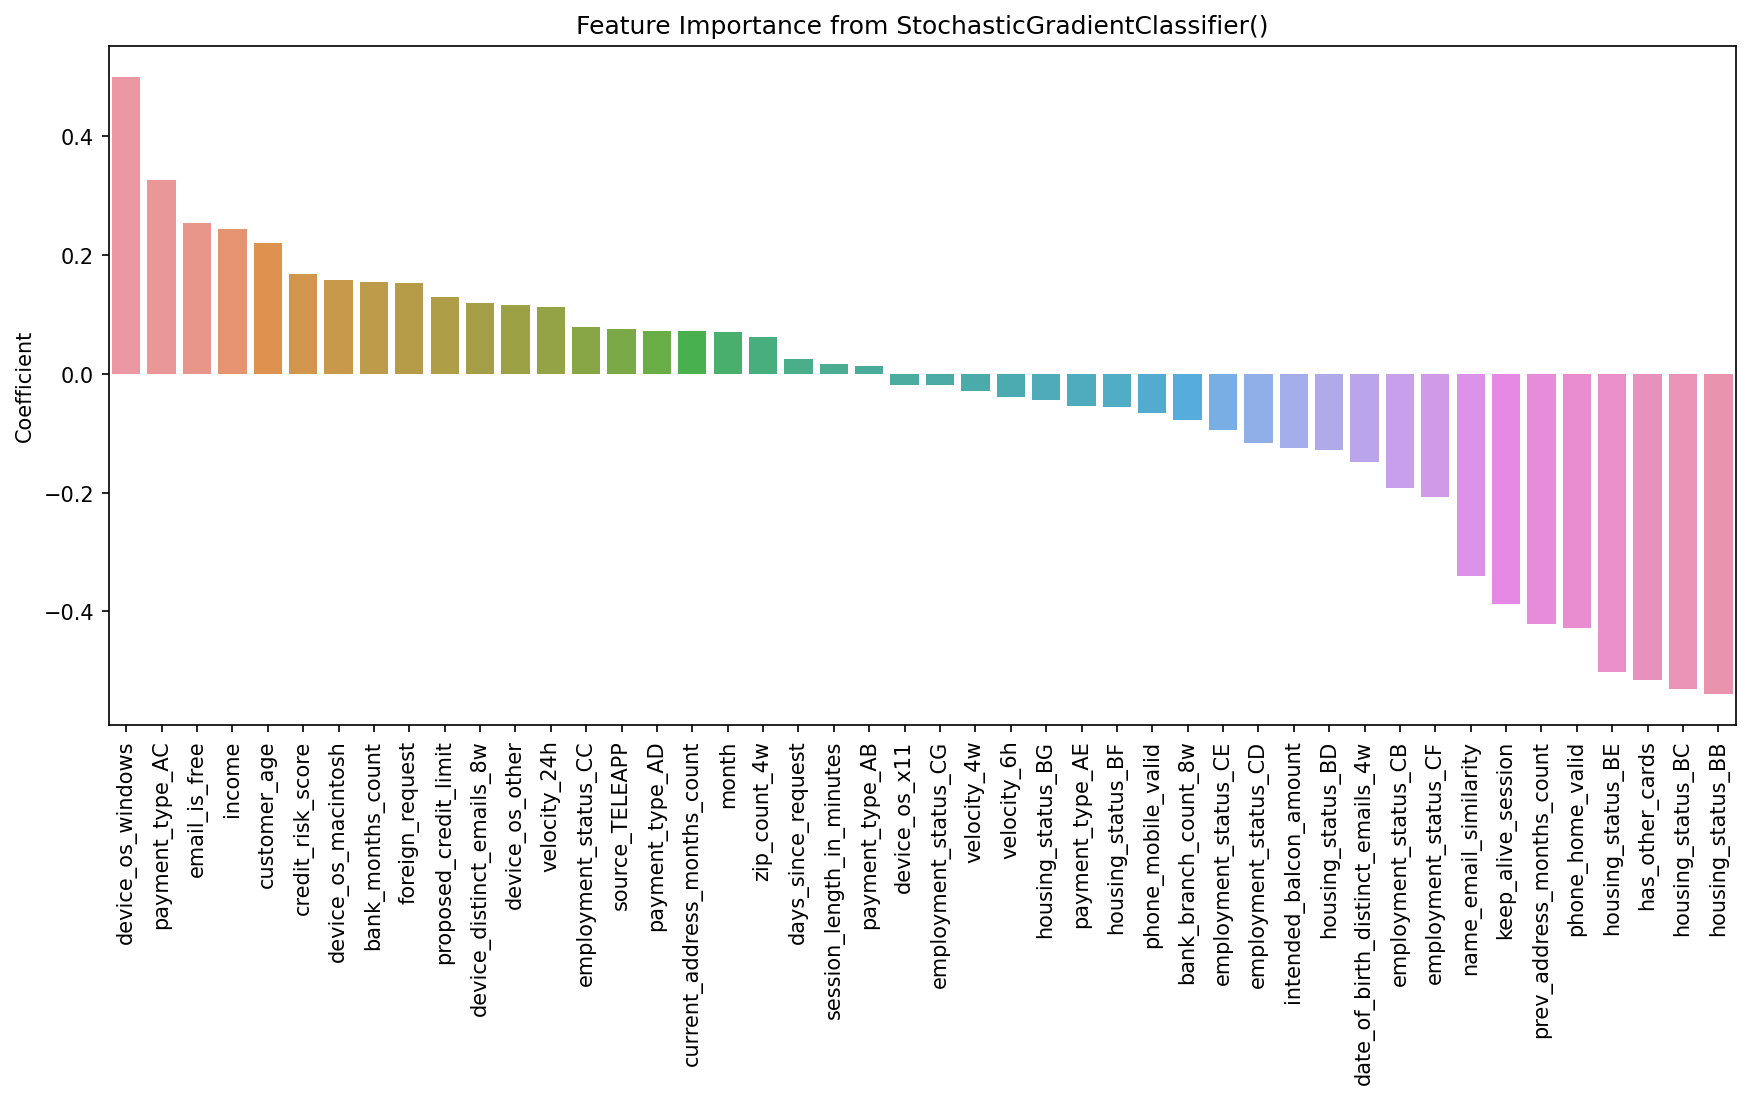

In [39]:
plt.figure(figsize=(14, 6), dpi=150)
sns.barplot(data=feat_df, x=feat_df.index, y='Coefficient')
plt.xticks(rotation=90)
plt.title('Feature Importance from StochasticGradientClassifier()');

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

# Define the threshold based on FPR (max recall with less than 5% FPR)
FPR_LIM = 0.05

# Score the test set
scored_test = model.predict_proba(X_test_scaled)[:,1]

# Calculate the ROC curve points
fpr, tpr, threshold = roc_curve(y_test, scored_test,)

# Obtain the threshold and TPR based on the FPR
obtained_tpr = tpr[fpr<FPR_LIM][-1]
obtained_threshold = threshold[fpr<FPR_LIM][-1]
obtained_fpr = fpr[fpr<FPR_LIM][-1]

In [41]:
print(f"""
Model TPR: {round(obtained_tpr, 4)}
Model FPR: {round(obtained_fpr, 4)}
Model Threshold : {round(obtained_threshold, 4)}
""")


Model TPR: 0.496
Model FPR: 0.0498
Model Threshold : 0.0413



In [5]:
# plot the false-positive rate of a model compared to the true-positive rate (ROC-Curves)
def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr, label='ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend()
    plt.show()
    
plot_roc(obtained_fpr, obtained_tpr)    


NameError: name 'obtained_fpr' is not defined

In [42]:
from aequitas.group import Group

# Calculating fairness metrics on the predictions
g = Group()

df1 = pd.DataFrame({"score": scored_test, "label_value": y_test, "age": (X_test["customer_age"] > 50).map({True: ">50", False: "<=50"})})

fairness_metrics = g.get_crosstabs(df1, score_thresholds={"score_val": [obtained_threshold]})[0]

KeyError: 'score_val'

In [ ]:
# Transform categorical types.
for col in ["payment_type", "employment_status", "housing_status", "source", "device_os"]:
    df[col] = df[col].astype("category")

# We will be making a split based on month of the year. Also, we will split features from label.
X_train, y_train = df[df["month"]<6].drop(columns=["fraud_bool"]), df[df["month"]<6]["fraud_bool"]
X_test, y_test = df[df["month"]>=6].drop(columns=["fraud_bool"]), df[df["month"]>=6]["fraud_bool"]

In [ ]:
X_test.month.unique()

In [ ]:
model = SGDClassifier(loss='log_loss')
model.fit(X_train, y_train)